In [2]:
from collections import defaultdict, Counter
import pandas as pd
from nltk import ngrams
import spacy

In [3]:
#!python -m spacy download en
_spacy = spacy.load("en_core_web_sm")

In [4]:
_df = pd.concat([
    pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_speak_test_out_domain_22sept/appliances.csv', error_bad_lines=False, warn_bad_lines=True),
    pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_speak_test_out_domain_22sept/food.csv', error_bad_lines=False, warn_bad_lines=True),
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_indoor.csv', error_bad_lines=False, warn_bad_lines=True),
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_outdoor.csv', error_bad_lines=False, warn_bad_lines=True),
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_vehicles.csv', error_bad_lines=False, warn_bad_lines=True)
])

# pd.to_numeric(df['target domain'], errors='coerce')

print('target domain   :', _df['target domain'].unique())
print('listener domain :', _df['listener domain'].unique())
print('simulator domain:', _df['interpreter domain'].unique())
_df = _df.dropna()
print('Data points:', len(_df))

df = _df[_df['target domain'] != _df['listener domain']]
df = df[df['listener domain'] != 'all']
df = df[df['interpreter domain'] != 'all']
print('OOD data points:', len(df))

df.head(5)

/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_1217/3319831704.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_speak_test_out_domain_22sept/appliances.csv', error_bad_lines=False, warn_bad_lines=True),
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_1217/3319831704.py:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_speak_test_out_domain_22sept/appliances.csv', error_bad_lines=False, warn_bad_lines=True),
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_1217/3319831704.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.

target domain   : ['food' 'vehicles' 'outdoor' 'indoor' 'appliances']
listener domain : ['appliances' 'food']
simulator domain: ['appliances' 'food']
Data points: 6431
OOD data points: 5932


,Unnamed: 0,target domain,listener domain,interpreter domain,target img idx,img path #0,img path #1,img path #2,img path #3,img path #4,...,adapted_acc_s0,adapted_acc_s1,adapted_acc_s2,adapted_acc_s3,adapted_acc_s4,int_list_acc0,int_list_acc1,int_list_acc2,int_list_acc3,int_list_acc4
0,0,food,appliances,appliances,3,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,1,food,appliances,appliances,1,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,2,food,appliances,appliances,1,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,4,food,appliances,appliances,0,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5,5,food,appliances,appliances,5,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,/home/dizzi/Desktop/pb_speaker_adaptation/data...,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [5]:
df['adapted utt s0'].tolist()[50:80]

['see yup orange seat',
 'i have the seat markings light .',
 'i have the seat with the red sprinkled again',
 'plaid ?',
 'plaid ?',
 'plaid ?',
 'plaid ?',
 'plaid ?',
 'sandwich ?',
 'i have the seat with the image making again',
 'sandwich ?',
 'sandwich ?',
 'sandwich ?',
 'sandwich ?',
 'sandwich ?',
 'sandwich ?',
 'i have the seat with the image making again',
 'i have the seat with the image making again',
 'i have the seat with the image making again',
 'sandwich ?',
 'i have the seat with the image making again',
 'sandwich ?',
 'sandwich ?',
 'sandwich ?',
 'i have the seat with the image making again',
 'sandwich ?',
 'sandwich ?',
 'sandwich ?',
 'sandwich ?',
 'sandwich ?']

In [6]:
refs = df['golden utt'].tolist()
hyps = {
    "h0": df['original utt'].tolist(),
    "h0' 0": df['adapted utt s0'].tolist(),
    "h0' 1": df['adapted utt s1'].tolist(),
    "h0' 2": df['adapted utt s2'].tolist(),
    "h0' 3": df['adapted utt s3'].tolist(),
    "h0' 4": df['adapted utt s4'].tolist(),
#     "h0' 5": df['adapted utt s5'].tolist(),
#     "h0' 6": df['adapted utt s6'].tolist(),
#     "h0' 7": df['adapted utt s7'].tolist(),
#     "h0' 8": df['adapted utt s8'].tolist(),
#     "h0' 9": df['adapted utt s9'].tolist(),
}

In [7]:
pos = defaultdict(lambda: defaultdict(lambda: Counter()))

for ref in refs:
    pos_seq = [tok.pos_ for tok in _spacy(ref)]
    for N in range(1, 2):
        for ngram in ngrams(pos_seq, N):
            pos[N]['ref'][ngram] += 1        
            
for hyp_type in hyps:
    for hyp in hyps[hyp_type]:
        pos_seq = [tok.pos_ for tok in _spacy(hyp)]
        for N in range(1, 2):
            for ngram in ngrams(pos_seq, N):
                pos[N][hyp_type][ngram] += 1
                
for hyp_type in list(hyps.keys()) + ['ref']:
    for N in range(1, 2):
        tot = sum(pos[N][hyp_type].values())
        for k, v in pos[N][hyp_type].items():
            pos[N][hyp_type][k] = v / tot


In [8]:
pos_df_1 = pd.DataFrame(pos[1].values(), index=pos[1].keys())
# pos_df_2 = pd.DataFrame(pos[2].values(), index=pos[2].keys())
# pos_df_3 = pd.DataFrame(pos[3].values(), index=pos[3].keys())

<AxesSubplot:>

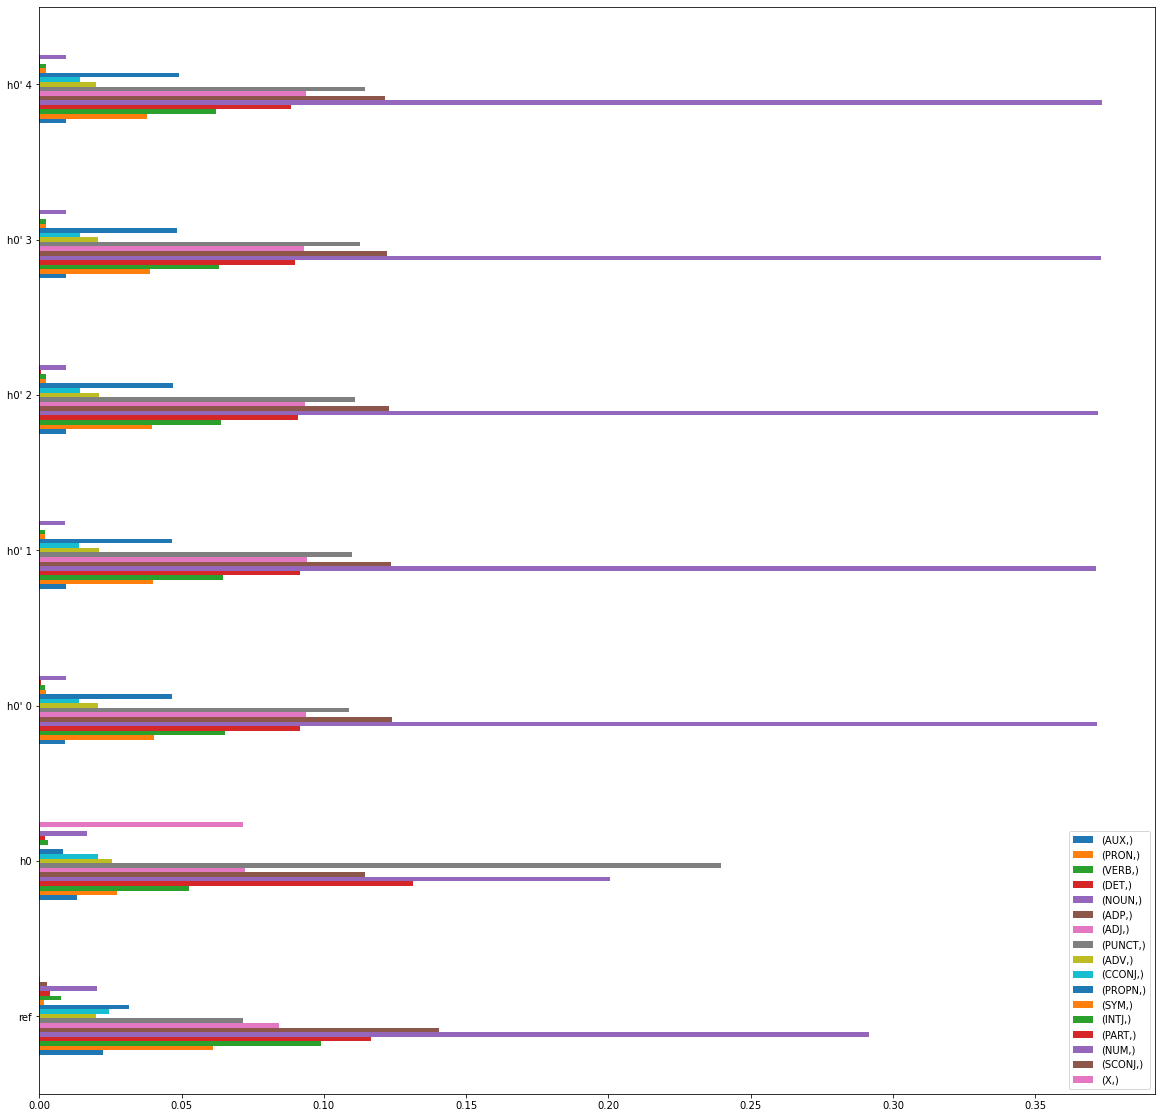

In [9]:
pos_df_1.plot.barh(figsize=(20,20))

In [38]:
for k,v in pos[1]['h0'].items():
    print(k, v)

('PROPN',) 0.6
('NOUN',) 0.2
('ADP',) 0.2
